In [1]:
import astropy.units as u
import astropy.coordinates as coord
import matplotlib.pyplot as plt
plt.style.use('apw-notebook')
import numpy as np
%matplotlib inline
from pygaia.errors import astrometric
from pygaia.photometry.utils import gabsFromSpt, vminiFromSpt

Get absolute $M_G$-band magnitude and (V-I) color from the spectral type:

In [2]:
M_G = gabsFromSpt('M0III')
V_I = vminiFromSpt('M0III')

Assumed *photometric* fractional distance error:

In [ ]:
phot_dist_err = 0.2

Grid of distances, computed grids in parallax, apparent $G$-band magnitude:

In [24]:
dist = coord.Distance(np.linspace(5, 35, 128)*u.kpc)
plx = dist.to(u.microarcsecond, equivalencies=u.parallax())
G = (M_G*u.mag + dist.distmod).value

In [30]:
for assumed_v in [10, 25., 50] * u.km/u.s:
    assumed_pm = (assumed_v / dist).to(u.microarcsecond/u.yr, equivalencies=u.dimensionless_angles())

    sigma_plx = astrometric.parallaxErrorSkyAvg(G, V_I) * u.microarcsecond
    err = sigma_plx / plx
    err[err > phot_dist_err] = phot_dist_err

    # now velocity stuff
    sigma_pm = astrometric.properMotionErrorSkyAvg(G, V_I) * u.microarcsecond/u.yr
    sigma_pm = np.sqrt(np.sum(sigma_pm**2, axis=0))

    term1 = (dist**2 * sigma_pm**2).to(u.km**2/u.s**2, equivalencies=u.dimensionless_angles())
    term2 = ((dist*err)**2 * assumed_pm**2).to(u.km**2/u.s**2, equivalencies=u.dimensionless_angles())

    vtan_err = np.sqrt(term1 + term2)
    print(np.min(vtan_err), np.max(vtan_err))

0.3892450884621848 km / s 7.293847673035672 km / s
0.9266720594906046 km / s 8.613954601543236 km / s
1.839692595229646 km / s 12.214753942566666 km / s


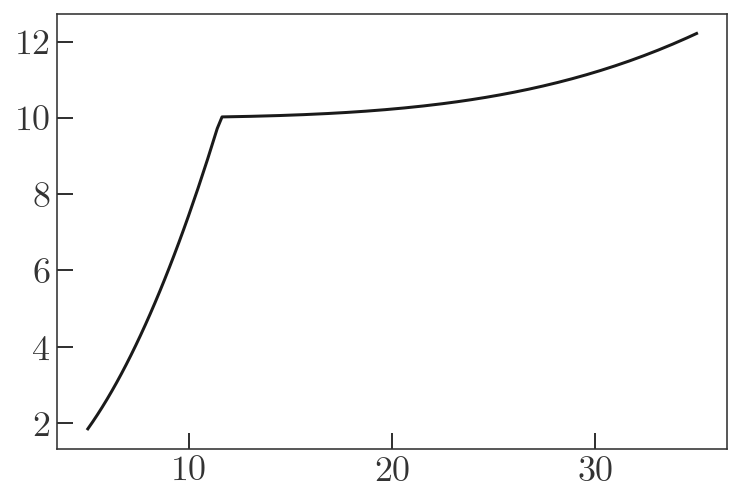

In [31]:
plt.plot(dist, vtan_err, marker='')